### MGC (Millenium Galaxy Catalogue) vs CNGFPPR (Catalogue Nearby Galaxies with Full Posteriors on Photometric Redshfits) Comparison

More info on MGC - https://hsweb.hs.uni-hamburg.de/projects/observational-astronomy/mgc/

 - Compare catalog to MGC. Completness (do we find all the galaxies in MGC), purity (is there a lot of crap in our catalog that is not in MGC and which is not real), accuracy (do our z agree with MGC, and are the MGC z within 95% of the PDF).

 - x-match MGC and PS1 cat, what is the reason for things that are in former but not latter and vice versa. Look at cutouts.


In [1]:
# import mgc zcat
# filter between 17 & 20 mag
# compare numbers between cngfppr and zcat
    # same no of gals?
    # predicted redshift vs real redshift distribution
    
#  xmatch
    # find stuff in both cats (good)
    # find stuff in cngfppr but not mgc (what is it?)
    # stuff in mgc but not cngfppr
        #look at cutouts
    # how accurate are the xmatched redshifts?
        # do our z agree and are mgc within 95% of CDE
    

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
import seaborn as sns
import astropy.units as u
from astropy.coordinates import SkyCoord, match_coordinates_sky
import mastcasjobs

import redshiftpredictor as rp
import astroFuncs as af

#### To Do:
 - Import zcat from MGC 
 - Get CNGFFPPR data from pipeline
 - Compare numbers between MGC (taken as truth) and CNGFPPR (which we are testing)
 - 

In [3]:
#setting mgc filepath for data
filepath="/home/richard/Work/placement_project/CNGFPPR/data/"

This Catalogue contains information about all sources below Bmag 20. The CNGFPPR contains objects between 17th and 20th r magnitude (ps1).

In [4]:
#reading in mgc zcat to compare CNGFPPR to
mgc_zcat_all = pd.read_csv(filepath+"mgc_zcat.txt",
            delim_whitespace=True,
            names=["ID", "MGCFN", "ALPHA_J2000", "DELTA_J2000", "QUALITY", "CLASS", "INEXR",
                   "SDSS_OBJID", "SDSS_PSFMAG_G", "SDSS_PSFMAG_R", "SDSS_PSFMAG_I", "SDSS_PSFMAG_Z",
                   "SDSS_PETMAG_G", "SDSS_PETMAG_R", "SDSS_PETMAG_I", "SDSS_PETMAG_Z",
                   "BEST_Z", "BEST_ZQUAL"],
            usecols=[0, 1, 5, 6, 16, 18, 19, 21, 29, 30, 31, 32, 34, 35, 36, 37, 121, 122],
            on_bad_lines="skip")

mgc_zcat_all = mgc_zcat_all.query("CLASS==1")

So we will filter zcat to compare correctly... over a small section chosen for comparison

In [5]:
mgc_zcat_roi = mgc_zcat_all.query("ALPHA_J2000 > 175 & ALPHA_J2000 < 205 &\
                        DELTA_J2000 > 0 & DELTA_J2000 < 0.09")
#taking class = 1 only returns galaxies in the cat

In [6]:
mgc_zcat_comp = mgc_zcat_roi.query("SDSS_PETMAG_R < 20 &\
                           SDSS_PETMAG_R > 17") 



Now that we have the catalogue for comparison to CNGFPPR it's time to get the CNGFPPR for a small area of sky covered by MGC. First we look at teh area covered, note this is a long rectangular area and not square as implied in the plot below. The shaded region is a 3.15 degree (35 * 0.09 degrees) area. Which we will run the CNGFPPR data processing on.

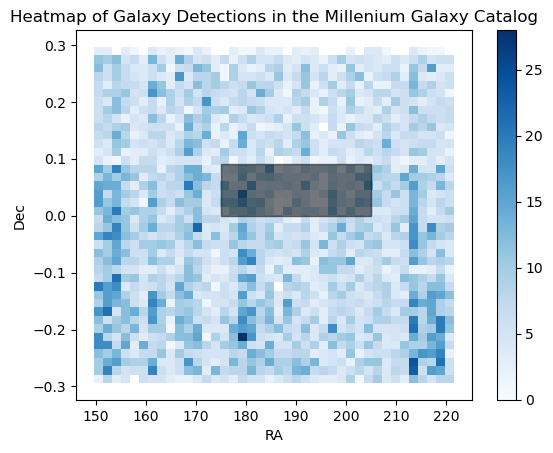

In [7]:
fig, axs = plt.subplots()

sns.histplot(x=mgc_zcat_all.ALPHA_J2000, y=mgc_zcat_all.DELTA_J2000,
            cbar=True, cmap="Blues", ax=axs, bins=40)

plt.xlabel("RA")
plt.ylabel("Dec")
plt.title("Heatmap of Galaxy Detections in the Millenium Galaxy Catalog")

rect = patches.Rectangle((175,0), 30, 0.09, linewidth=1,
                         edgecolor='k', facecolor="k", alpha=0.5)
axs.add_patch(rect)

plt.show()

Now getting the data for the shaded region for the CNGFPPR Pipeline.

In [12]:
ra1, ra2 = 175, 205
dec1, dec2 = 0, 0.09


table_name = "PS1_MGC_PipelineTest"
task_name = "PS1_MGC_PipelineTest"

job_context = mastcasjobs.MastCasJobs(context="PanSTARRS_DR2")



In [13]:
af.mastcasjobs_init()

if table_name in job_context.list_tables():
    ps1 = af.retrieve_table(table_name)
else:
    ps1 = af.search_rect_region(ra1, ra2, dec1, dec2,
                            table_name=table_name, task_name=task_name)


ValueError: table MyDB.PS1_MGC_PipelineTest not found

In [ ]:
ps1

In [ ]:
bright_stars = af.square_search_bright_stars(190, 0.045, 30, 0.09)
resolved_gals = af.square_search_hleda(190, 0.045, 30, 0.09)

In [ ]:
cdes, zgrid, gal_info = rp.generate_redshift_predictions(ps1,
                                               bright_stars,
                                               resolved_gals,
                                               n_grid=1000,
                                               return_df=True)

In [ ]:
mgc_zcat_comp

In [ ]:
gal_info

In [ ]:
cdes